一開始先把all_beta_normalized_train 改為 只保留 |dbeta| > 0.35的版本

In [5]:
import pandas as pd

nor = pd.read_csv("../champ_result/all_beta_normalized_train.csv")
bio = pd.read_csv("../result/result_test_cut_point_cross_vali_dmptest.csv")

print(nor.head())
print(bio.head())

df_mix = pd.merge(nor, bio,how='inner',left_on="Unnamed: 0",right_on= "Unnamed: 0")

result_df = df_mix[nor.columns]

print(result_df.head())

result_df.to_csv("../result/all_beta_normalized_train_035.csv",index=False)

   Unnamed: 0         1         2         3         4         5         6  \
0  cg00000957  0.825079  0.825079  0.836188  0.836188  0.855953  0.855953   
1  cg00001349  0.690023  0.690023  0.802989  0.802989  0.744400  0.744400   
2  cg00001583  0.095879  0.095879  0.030527  0.030527  0.058828  0.058828   
3  cg00002028  0.037414  0.037414  0.028130  0.028130  0.036667  0.036667   
4  cg00002837  0.393330  0.393330  0.278496  0.278496  0.354795  0.354795   

          7         8         9  ...       881       882       883       884  \
0  0.856379  0.856379  0.833668  ...  0.901550  0.901550  0.873928  0.873928   
1  0.826541  0.826541  0.683470  ...  0.864090  0.864090  0.878295  0.878295   
2  0.103293  0.103293  0.054348  ...  0.788893  0.788893  0.566003  0.566003   
3  0.026973  0.026973  0.032372  ...  0.053580  0.053580  0.037539  0.037539   
4  0.371494  0.371494  0.372948  ...  0.799111  0.799111  0.654631  0.654631   

        885       886       887       888       889     

取得套件

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

拿取train 資料

In [42]:
normalized_train = pd.read_csv('../result/all_beta_normalized_train_0.4.csv')

normalized_test = pd.read_csv('../result/all_beta_normalized_test_0.4.csv')

X = pd.concat([normalized_train.iloc[:,1::2], normalized_test.iloc[:,1::2]], axis=1, ignore_index=True)
X = X.T
# X_train = normalized_train.iloc[:, 1::2]
# X_test = normalized_test.iloc[:, 1::2]

將資料作為每個人的特徵

In [43]:
Y = np.array([ (0 if i < 47 else 1)  for i in range(445)] + [ (0 if i < 50 else 1)  for i in range(450)])

In [44]:
print(X.shape)
print(Y.shape)

(895, 139)
(895,)


開始預測

In [45]:

# 建立 Random Forest Classifier 模型
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
# 使用訓練資料訓練模型

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

randomForestModel.fit(X_train, Y_train)
# 使用訓練資料預測分類
predicted = randomForestModel.predict(X_train)
predicted_t = randomForestModel.predict(X_test)

print('訓練集: ',randomForestModel.score(X_train,Y_train))
print('測試集: ',randomForestModel.score(X_test,Y_test))

# 預測成功的比例


訓練集:  1.0
測試集:  0.9832402234636871


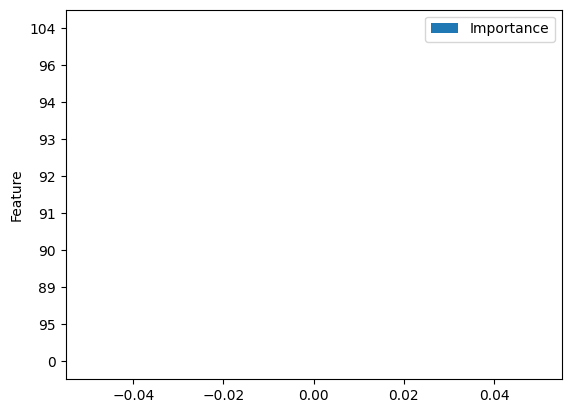

In [46]:
result = permutation_importance(randomForestModel, X_train, Y_train, n_repeats=10, random_state=0)
#feature_importance = dict(zip(X.columns, result.importances_mean))
permutation_importance_result = pd.DataFrame({'Feature': X_train.columns, 'Importance': result.importances_mean})
permutation_importance_result.sort_values(by='Importance', ascending=False)
# draw graph of feature importances for better visualization
permutation_importance_result.sort_values(by='Importance', ascending=False).head(10).plot(kind='barh', x='Feature', y='Importance')
plt.show()


將特徵重要程度輸出並匯出

In [48]:

print('特徵重要程度: ',randomForestModel.feature_importances_)

df = pd.DataFrame({
    'Probe_ID': normalized_train['Unnamed: 0'],
    'import_level_in_forest': randomForestModel.feature_importances_
})

# print(df)

df.to_csv("../result/imp_level.csv",index=False)

特徵重要程度:  [1.32234433e-02 2.88823522e-04 1.00550856e-03 4.82653004e-03
 6.20264592e-04 5.69630535e-04 2.57177804e-02 1.60466236e-02
 6.18858406e-04 4.43388471e-04 5.22003848e-03 1.96193386e-02
 9.70786683e-04 2.07725652e-05 3.35585189e-04 1.10795744e-03
 3.68910169e-02 3.55409146e-04 1.75350275e-03 1.04700054e-03
 4.96394732e-04 8.00104258e-04 8.03985057e-04 8.53056441e-04
 8.63316192e-02 1.21832292e-03 2.02025345e-04 2.36023392e-03
 3.27925250e-02 1.46726730e-03 1.54852284e-03 1.18752764e-04
 1.38407337e-02 2.62204723e-04 3.54156920e-03 3.17352394e-02
 1.00896153e-03 6.05026369e-04 4.89855178e-03 3.28142577e-03
 2.64446985e-03 1.87868778e-03 1.78532884e-04 3.53707609e-03
 5.17433509e-04 9.56697622e-04 3.73543377e-03 2.05202619e-03
 1.23183218e-02 4.31079789e-04 2.50764504e-02 8.88734602e-03
 3.78607980e-02 2.77170367e-03 1.31009395e-02 3.47124484e-04
 2.51687282e-02 9.51264988e-04 6.55373074e-03 2.71652777e-03
 1.72826232e-04 1.53970217e-04 2.89413214e-03 1.34231223e-04
 1.72079420e-03

使用cross validation 並拓展多棵樹(100~1100)

[0.98876404 0.98876404 0.96629213 0.98876404 0.98876404]
0.9842696629213483


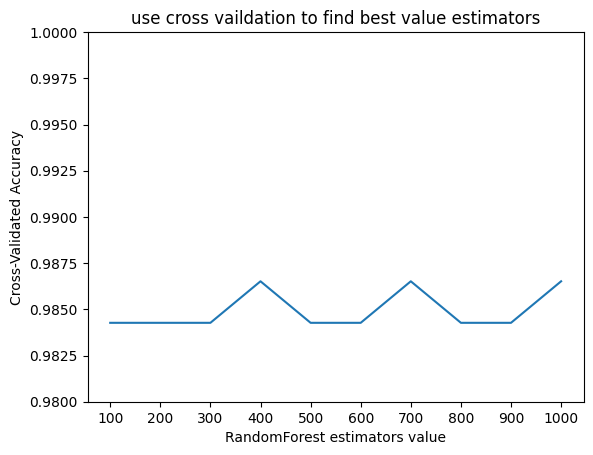

In [11]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')

scores = cross_val_score(randomForestModel,x,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

k_range = range(100,1100,100)
rf_score_n_estimators = []

for i in range(100,1100,100):
    randomForestModel = RandomForestClassifier(n_estimators=i, criterion = 'gini')
    scores = cross_val_score(randomForestModel,x,y,cv=5,scoring='accuracy')
    rf_score_n_estimators.append(scores.mean())

# print(df)

plt.plot(k_range,rf_score_n_estimators)
plt.ylim(0.98,1.0)
plt.xlabel('RandomForest estimators value')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.title('use cross vaildation to find best value estimators')
plt.show()

In [14]:
gene_name = pd.read_csv('../result/DMP_logFC.csv')
for i in range(3):
    dc = []
    cl_ = str(i+1)
    cl_f = pd.read_csv("../result/cluster_rank_"+cl_+".csv")

    normalized_train_c = normalized_train[normalized_train['Unnamed: 0'].isin(cl_f['Probe_ID'])]

    X_train = normalized_train_c.iloc[:, 1::2]
        
    x = []

    for i in range(445):
        X = X_train.iloc[:, i]

        X = X.values.flatten().tolist()

        x.append(X)
        
    randomForestModel = RandomForestClassifier(n_estimators=80, criterion = 'gini')
    # 使用訓練資料訓練模型

    result_df = pd.DataFrame()
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
        #random_state => 改變其亂數，不然將會三次都切到同樣的數據
            # print(y_train) #確認是否改變，
        randomForestModel.fit(X_train, y_train)
        # 使用訓練資料預測分類
        predicted = randomForestModel.predict(X_train)
        predicted_t = randomForestModel.predict(X_test)

        print('訓練集: ',randomForestModel.score(X_train,y_train))
        print('測試集: ',randomForestModel.score(X_test,y_test))

        # print('特徵重要程度: ',randomForestModel.feature_importances_)

        df = pd.DataFrame({
            'Probe_ID': normalized_train_c['Unnamed: 0'],
            'import_level_in_forest': randomForestModel.feature_importances_
        })
        
        df_mix = pd.merge(df, gene_name,how='inner',left_on="Probe_ID",right_on= "ID")

        print(len(df_mix))
        print(len(df))
        df_mix = df_mix[['Probe_ID','import_level_in_forest','gene']]
        df_mix = df_mix.sort_values(by='import_level_in_forest', ascending=False)
        # df_mix.to_csv("../result/imp_level_cl_"+cl_+"/result"+str(i+1)+".csv",index=False)
        df_mix['iteration'] = i + 1  # 添加一列表示迭代次數
        # 附加到結果資料框
        result_df = pd.concat([result_df, df_mix], axis=1)

   
    result_df.to_csv("../result/imp_level_cl_"+cl_+"/result_all.csv",index=False)
    randomForestModel = RandomForestClassifier(n_estimators=80, criterion = 'gini')

    scores = cross_val_score(randomForestModel,x,y,cv=5,scoring='accuracy')
    print(scores)
    print(scores.mean())


訓練集:  1.0
測試集:  0.9775280898876404
99
110
訓練集:  1.0
測試集:  1.0
99
110
訓練集:  1.0
測試集:  1.0
99
110
訓練集:  1.0
測試集:  1.0
99
110
訓練集:  1.0
測試集:  0.9887640449438202
99
110
[0.98876404 0.98876404 0.97752809 0.98876404 0.98876404]
0.9865168539325841
訓練集:  1.0
測試集:  0.9662921348314607
53
71
訓練集:  1.0
測試集:  0.9887640449438202
53
71
訓練集:  1.0
測試集:  0.9887640449438202
53
71
訓練集:  1.0
測試集:  1.0
53
71
訓練集:  1.0
測試集:  0.9775280898876404
53
71
[0.98876404 0.97752809 0.97752809 0.98876404 0.98876404]
0.9842696629213481
訓練集:  1.0
測試集:  0.9775280898876404
159
192
訓練集:  1.0
測試集:  1.0
159
192
訓練集:  1.0
測試集:  0.9887640449438202
159
192
訓練集:  1.0
測試集:  1.0
159
192
訓練集:  1.0
測試集:  0.9887640449438202
159
192
[0.98876404 0.98876404 0.96629213 0.98876404 0.98876404]
0.9842696629213483
